In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too

2024-03-18 13:15:32.711716: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 13:15:32.748025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 13:15:32.748066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 13:15:32.749130: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 13:15:32.756982: I tensorflow/core/platform/cpu_feature_guar

In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
# sparse  =  0 0 0 0 0
#            0 0 0 0 0
#            0 0 1 0 0 
#            0 0 0 0 0
#            0 0 0 0 0
#이 있을때 (2, 2, 1)로 표현하는 방식을 사용할 것인가 묻는것 (2행 2열 의 값이 1이다.)
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [5]:
enc.categories_

[array([0, 1, 2])]

In [6]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, 
                                                    test_size=0.2,
                                                    random_state=13)

print(len(X_train), len(y_train))

120 120


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])
model.summary()

In [33]:
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2024-02-26 11:45:03.973993: I external/local_xla/xla/service/service.cc:168] XLA service 0x5578a910fb90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 11:45:03.974012: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 11:45:03.978296: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-26 11:45:04.312120: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
I0000 00:00:1708915504.395273   11361 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 3s 6ms/step - loss: 1.1856 - accuracy: 0.0333
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0971 - accuracy: 0.1333
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0297 - accuracy: 0.2917
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9806 - accuracy: 0.5250
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9293 - accuracy: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8794 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8267 - accuracy: 0.6583
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7761 - accuracy: 0.6917
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7297 - accuracy: 0.8333
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.9333
Epoch 11/100
4/4 [=======================

In [35]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0812 - accuracy: 0.9667 - 130ms/epoch - 130ms/step


[0.08118686079978943, 0.9666666388511658]

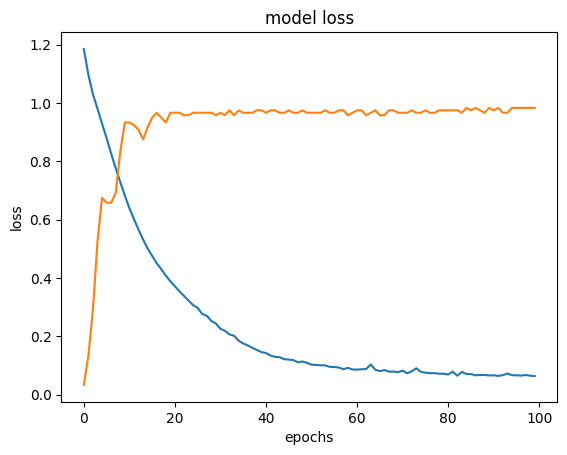

In [36]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()